**CONTEXT**

**To apply for a master's degree is a very expensive and intensive work. With this kernel, students will guess their capacities and they will decide whetherto apply for a master's degree or not.So, basically this set is about the Graduate Admissions data i.e. Given a set of standardized scores like GRE, TOEFL, SOP standard scores, LOR standard scores. All those folks who are preparing for Master's, might point out this question, from where did you get SOP & LOR scores. This project aimed to assist prospective students in making informed decisions by providing them with insights into their potential for admission, it's worth considering that universities might utilize internal rating systems to standardize these scores and enhance their predictive accuracy.**

In [1]:
#Used for Data Processing and Analysis
import pandas as pd
#Used for Mathematical Computations
import numpy as np
#Used for data visualizations
import matplotlib.pyplot as plt
#used for data Statistical visualizations
import seaborn as sns
#For calculate accuracy score from data
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
# Load the dataset using Pandas  
graduate_ad=pd.read_csv(r"C:\Python310\practice23\machine learning1\New folder\Admission_Predict_Ver1.1.csv")

In [3]:
#Extract first rows from datasets
graduate_ad.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#Extract last five rows from datasets
graduate_ad.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
#Total number of rows and columns
graduate_ad.shape

(500, 9)

In [6]:
#Information about the dataset like total no.of. rows,total no.of columns,datatypes of each columns and memory management
graduate_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
#Checking for any empty/null values present in dataset
graduate_ad.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
#Statistical measures of a dataframe
graduate_ad.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
graduate_ad.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

**PREPROCESSING THE DATASETS**

In [10]:
X=graduate_ad.drop(['Serial No.','Chance of Admit '],axis=1)

In [11]:
print(X)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
495        332          108                  5  4.5   4.0  9.02         1
496        337          117                  5  5.0   5.0  9.87         1
497        330          120                  5  4.5   5.0  9.56         1
498        312          103                  4  4.0   5.0  8.43         0
499        327          113                  4  4.5   4.5  9.04         0

[500 rows x 7 columns]


In [12]:
y=graduate_ad['Chance of Admit ']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

**SPLITTING DATASET INTO TRAINING AND TEST DATA**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [15]:
X_train,X_test,y_train,y_test

(     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
 249        321          111                  3  3.5   4.0  8.83         1
 433        316          111                  4  4.0   5.0  8.54         0
 19         303          102                  3  3.5   3.0  8.50         0
 322        314          107                  2  2.5   4.0  8.27         0
 332        308          106                  3  3.5   2.5  8.21         1
 ..         ...          ...                ...  ...   ...   ...       ...
 106        329          111                  4  4.5   4.5  9.18         1
 270        306          105                  2  2.5   3.0  8.22         1
 348        302           99                  1  2.0   2.0  7.25         0
 435        309          105                  2  2.5   4.0  7.68         0
 102        314          106                  2  4.0   3.5  8.25         0
 
 [400 rows x 7 columns],
      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Researc

In [16]:
print(X_train.shape,X_test.shape,X.shape)

(400, 7) (100, 7) (500, 7)


In [17]:
y_train=[1 if value>0.8 else 0 for value in y_train]
y_test=[1 if value>0.8 else 0 for value in y_test]
y_train=np.array(y_train)
y_test=np.array(y_test)

In [18]:
print(y_train)

[0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1
 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0
 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0]


In [19]:
print(y_test)

[1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]


**STANDARDSCALER**:


**The StandardScaler is a preprocessing technique commonly used in machine learning to transform numerical features in a dataset. 
It is used to standardize the scale of the features,  making them have a mean of 0 and a standard deviation of 1.**

In [20]:
 from sklearn.preprocessing import StandardScaler

In [21]:
SC=StandardScaler()

In [22]:
X_train=SC.fit_transform(X_train)
X_test=SC.fit_transform(X_test)

In [23]:
print(X_train)

[[ 0.38998634  0.6024183  -0.09829757 ...  0.56498381  0.4150183
   0.89543386]
 [-0.06640493  0.6024183   0.7754586  ...  1.65149114 -0.06785154
  -1.11677706]
 [-1.25302222 -0.87691722 -0.09829757 ... -0.52152352 -0.13445427
  -1.11677706]
 ...
 [-1.34430047 -1.37002906 -1.8458099  ... -1.60803084 -2.2157898
  -1.11677706]
 [-0.7053527  -0.38380538 -0.97205374 ...  0.56498381 -1.49981038
  -1.11677706]
 [-0.24896144 -0.21943477 -0.97205374 ...  0.02173015 -0.55072138
  -1.11677706]]


In [24]:
X_test

array([[ 1.48887961e+00,  1.56082934e+00,  7.76121546e-01,
         6.25913605e-01,  0.00000000e+00,  1.58648736e+00,
         8.50962943e-01],
       [-1.16381425e-01,  2.29631609e-01,  7.76121546e-01,
         1.12267043e+00,  5.31494003e-01,  7.77715255e-01,
         8.50962943e-01],
       [-3.61183733e-02, -2.69567541e-01, -9.87791059e-01,
        -1.36111371e+00, -1.06298801e+00, -1.47067119e+00,
        -1.17513930e+00],
       [-2.76907529e-01,  3.96031326e-01, -1.05834756e-01,
        -3.67600054e-01, -5.31494003e-01,  2.11574782e-01,
        -1.17513930e+00],
       [ 8.46775196e-01,  8.95230476e-01, -1.05834756e-01,
         1.29156776e-01, -5.31494003e-01,  7.93890697e-01,
         8.50962943e-01],
       [ 1.08756435e+00,  7.28830760e-01,  7.76121546e-01,
         1.12267043e+00,  5.31494003e-01,  1.08504865e+00,
         8.50962943e-01],
       [-2.04269467e+00, -1.10156613e+00, -1.86974736e+00,
        -1.85787054e+00, -1.59448201e+00, -1.61625017e+00,
        -1.1751393

In [25]:
#Importing LogisticRegression model
from sklearn.linear_model import LogisticRegression

**MODEL TRAINING AND EVALUATION**

In [26]:
logr=LogisticRegression()
logr.fit(X_train,y_train)
y_pred1=logr.predict(X_test)
print(accuracy_score(y_pred1,y_test))

0.96


In [27]:
matrix=confusion_matrix(y_pred1,y_test)

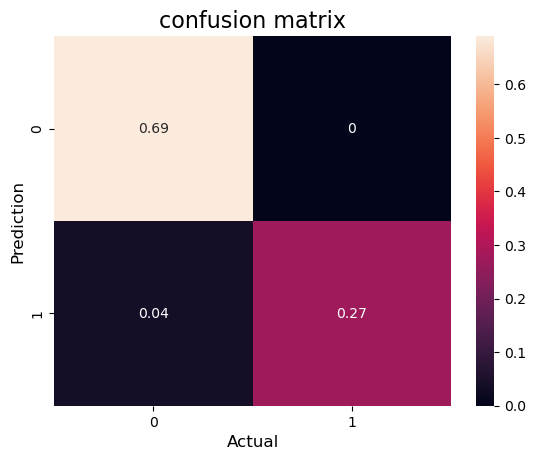

In [28]:
sns.heatmap(matrix/np.sum(matrix),
            fmt='g',
            annot= True)
plt.ylabel('Prediction', fontsize = 12)
plt.xlabel('Actual', fontsize = 12)
plt.title('confusion matrix',fontsize=16)
plt.show()

In [29]:
#Importing SupportVectorClassifier model
from sklearn import svm 

**MODEL TRAINING AND EVALUATION**

In [30]:
svm=svm.SVC()
svm.fit(X_train,y_train)
y_pred2=svm.predict(X_test)
print(accuracy_score(y_pred2,y_test))

0.97


In [31]:
matrix=confusion_matrix(y_pred2,y_test)

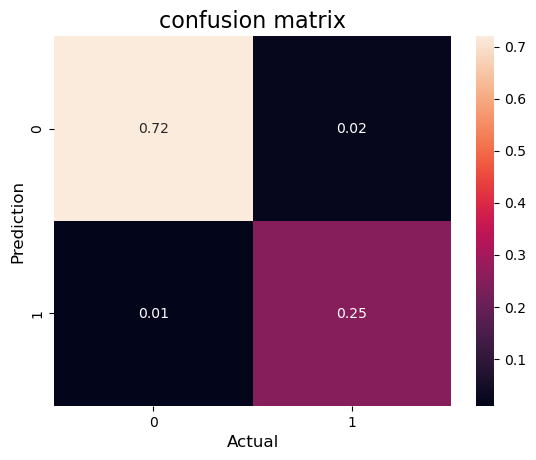

In [32]:
sns.heatmap(matrix/np.sum(matrix),
            fmt='g',
            annot= True)
plt.ylabel('Prediction', fontsize = 12)
plt.xlabel('Actual', fontsize = 12)
plt.title('confusion matrix',fontsize=16)
plt.show()

In [33]:
##Importing KNN model
from sklearn.neighbors import KNeighborsClassifier

**MODEL TRAINING AND EVALUATION**

In [34]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3=knn.predict(X_test)
print(accuracy_score(y_pred3,y_test))

0.97


C:\Users\Varshini\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
matrix=confusion_matrix(y_pred3,y_test)

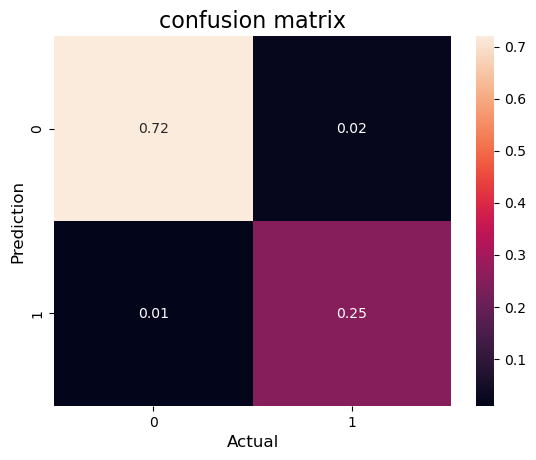

In [36]:
sns.heatmap(matrix/np.sum(matrix),
            fmt='g',
            annot= True)
plt.ylabel('Prediction', fontsize = 12)
plt.xlabel('Actual', fontsize = 12)
plt.title('confusion matrix',fontsize=16)
plt.show()

In [37]:
#Importing RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

**MODEL TRAINING AND EVALUATION**

In [38]:
RDF=RandomForestClassifier()
RDF.fit(X_train,y_train)
y_pred4=RDF.predict(X_test)
print(accuracy_score(y_pred4,y_test))

0.94


In [39]:
matrix=confusion_matrix(y_pred4,y_test)

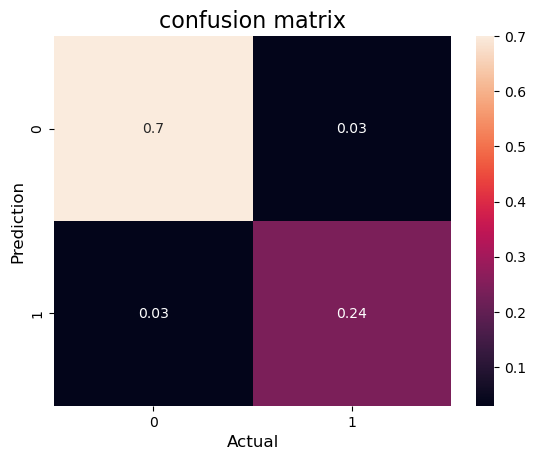

In [40]:
sns.heatmap(matrix/np.sum(matrix),
            fmt='g',
            annot= True)
plt.ylabel('Prediction', fontsize = 12)
plt.xlabel('Actual', fontsize = 12)
plt.title('confusion matrix',fontsize=16)
plt.show()

In [41]:
final_output=pd.DataFrame({'Model':['LR','SVC','KNN','RDF'],'ACCURACY_SCORE':[accuracy_score(y_pred1,y_test),
                                                                                   accuracy_score(y_pred2,y_test),
                                                                                   accuracy_score(y_pred3,y_test),
                                                                                   accuracy_score(y_pred4,y_test)]})

In [42]:
final_output

,Model,ACCURACY_SCORE
0,LR,0.96
1,SVC,0.97
2,KNN,0.97
3,RDF,0.94


**ACCURACY BARPLOT**


**Accuracy is a common metric used in machine learning and statistics to measure the performance of a classification model. It provides a straightforward way to understand how well the model is predicting the correct classes compared to the total number of instances**

C:\Users\Varshini\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='ACCURACY_SCORE'>

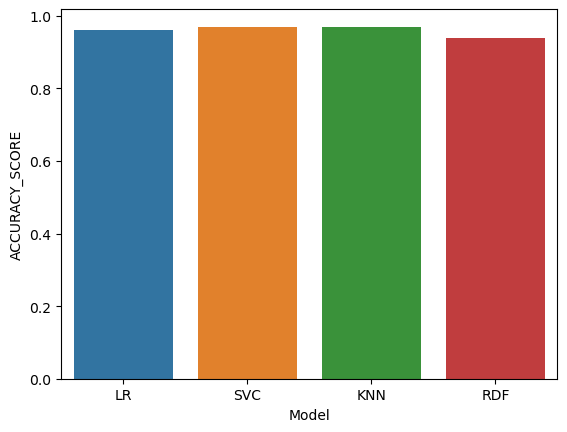

In [43]:
sns.barplot(final_output['Model'],final_output['ACCURACY_SCORE'])

Hence, SVM and KNearestNeighbours has more accuracy than other models, while comparing to the confusion matrix it has less **FN** values according to the classification model.